In [3]:
pip install fredapi

In [5]:
## Importing Libraries and creating a Fred object

import pandas as pd
import numpy as np
from fredapi import Fred
import matplotlib.pyplot as plt
import seaborn as sns

fred = Fred(api_key='Your API Key here')

In [6]:
start = '2022-01-31'
end = '2023-01-31'
monthyl_yield_curve = pd.DataFrame(fred.get_series(
    'T10Y2Y',
    observation_start=start,
    observation_end=end)).resample("M").mean()

fed_funds_rate = pd.DataFrame(fred.get_series(
    'FEDFUNDS',
    observation_start=start,
    observation_end=end)).resample("M").mean()

unemployment_rate = pd.DataFrame(fred.get_series(
    'UNRATE',
    observation_start=start,
    observation_end=end)).resample("M").mean()

sp500 = pd.DataFrame(fred.get_series(
    'SP500',
    observation_start=start,
    observation_end=end)).resample("M").mean()

In [7]:
df = pd.concat([monthyl_yield_curve,fed_funds_rate,unemployment_rate,sp500],axis=1)
df.columns = ['Yield_Curve','Fed_Funds','Unemp_Rate','sp500']

<ipython-input-8-0c241b71b655>:2: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))


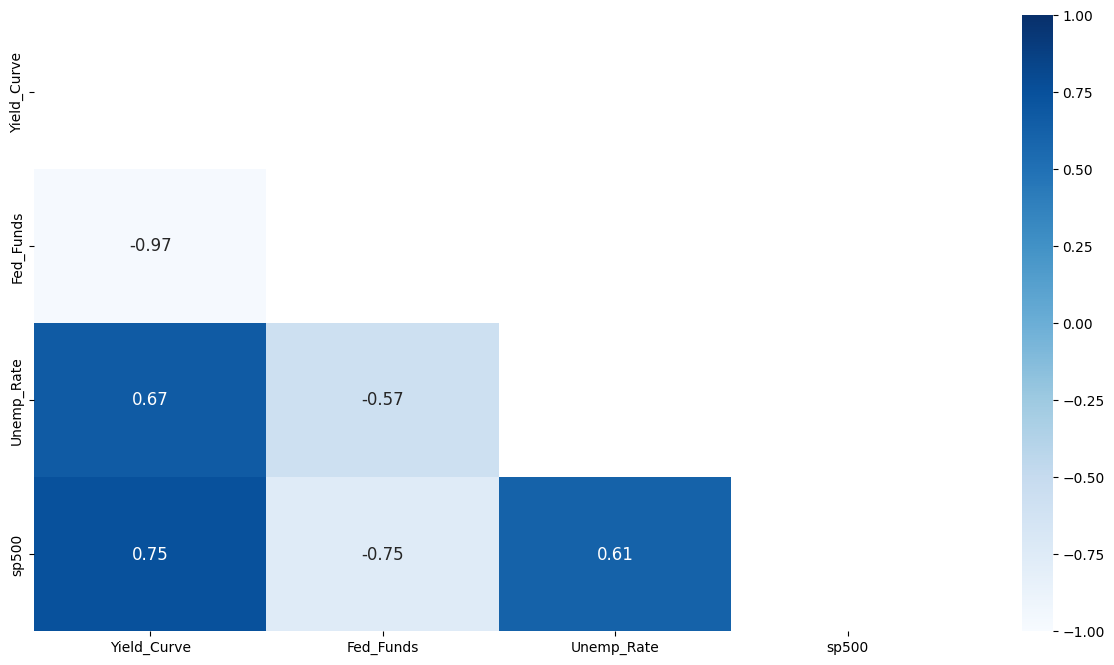

In [8]:
plt.figure(figsize=(15, 8))
mask = np.triu(np.ones_like(df.corr(), dtype=np.bool))
corr_map = sns.heatmap(df.corr(),vmin = -1,vmax = 1,mask = mask,cmap = "Blues",annot_kws={"size": 12},annot=True)

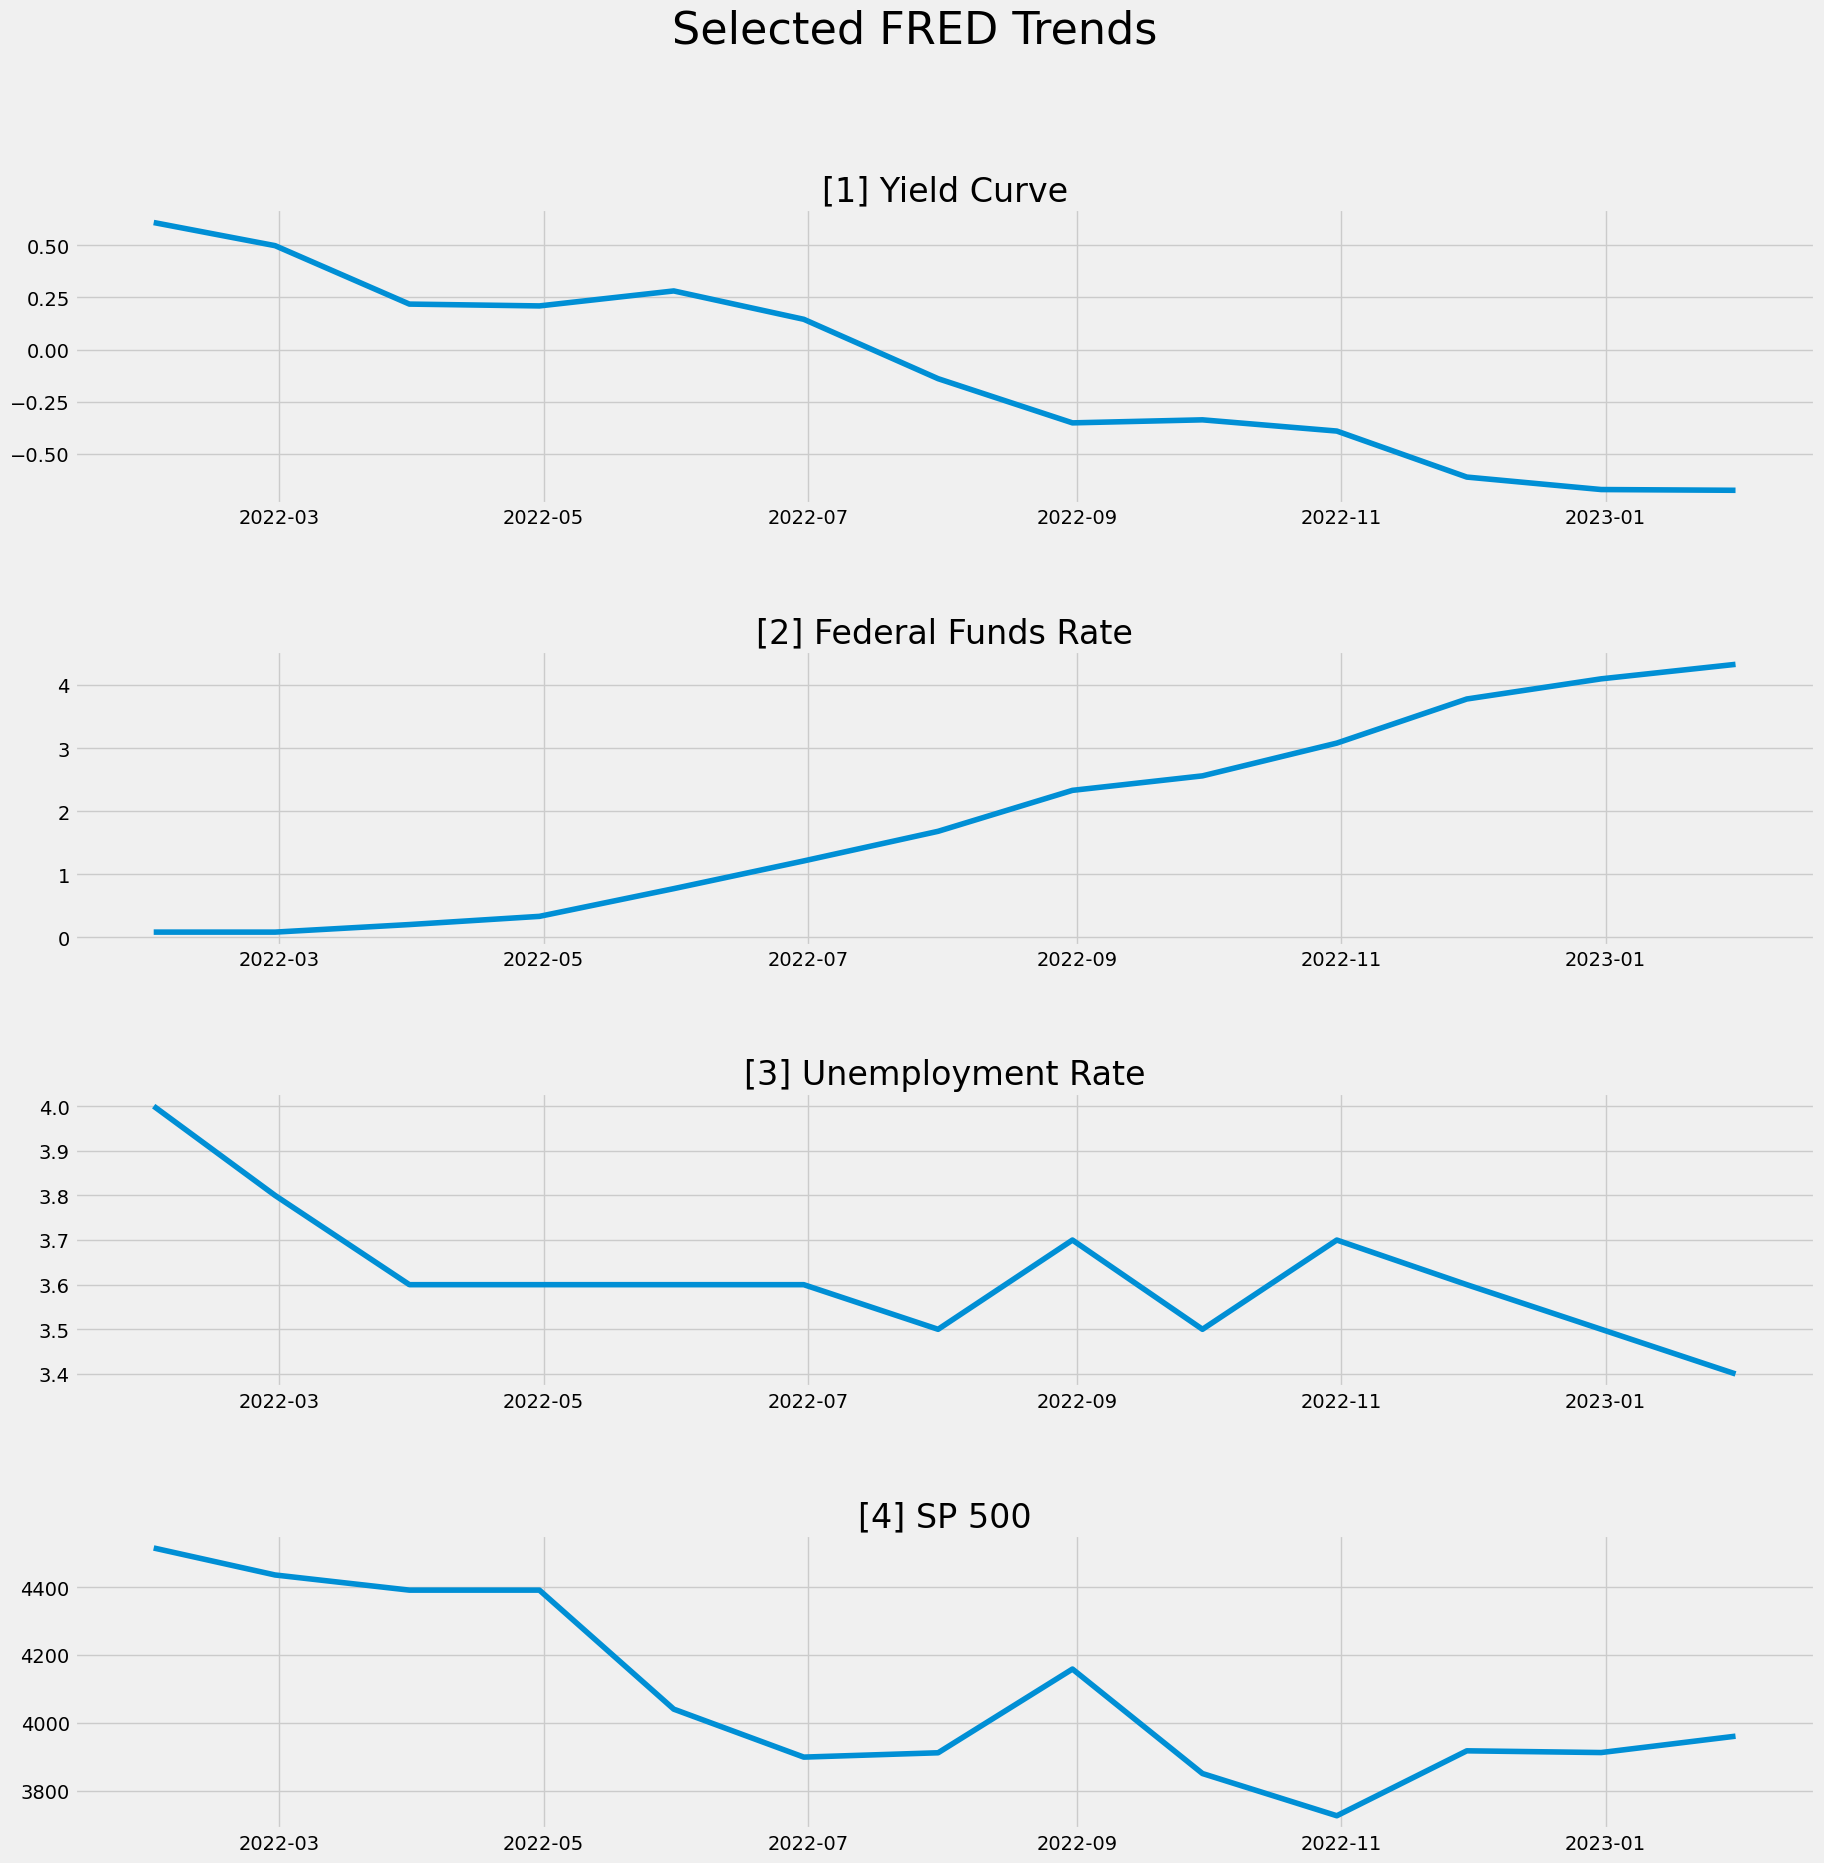

In [9]:
## Stacked line plots of all the data series

## Set Style
plt.style.use('fivethirtyeight')

## Create Multiple Plots and set overall size
fig, axs = plt.subplots(4,figsize=(20, 20))
fig.suptitle('Selected FRED Trends', fontsize = 32)
## Yield Curve
axs[0].plot(df.index,df.Yield_Curve)
axs[0].set_title('[1] Yield Curve', fontsize=24)

## Federal Funds Rate
axs[1].plot(df.index,df.Fed_Funds)
axs[1].set_title('[2] Federal Funds Rate', fontsize=24)

## Unemployment Rate
axs[2].plot(df.index,df.Unemp_Rate)
axs[2].set_title('[3] Unemployment Rate', fontsize=24)

## SP500
axs[3].plot(df.index,df.sp500)
axs[3].set_title('[4] SP 500', fontsize=24)

## Adjust space between plots and show plots
plt.subplots_adjust(hspace=0.5)
plt.show()